## Importing Dependencies

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# convert text data into numerical value
from sklearn.feature_extraction.text import TfidfVectorizer

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# evaluation of testing data
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

## Exploratory Data Analysis

In [10]:
df = pd.read_csv("spam_ham_dataset.csv")

In [11]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
df.shape

(5171, 4)

Text(0.5, 1.0, 'Spam or Ham')

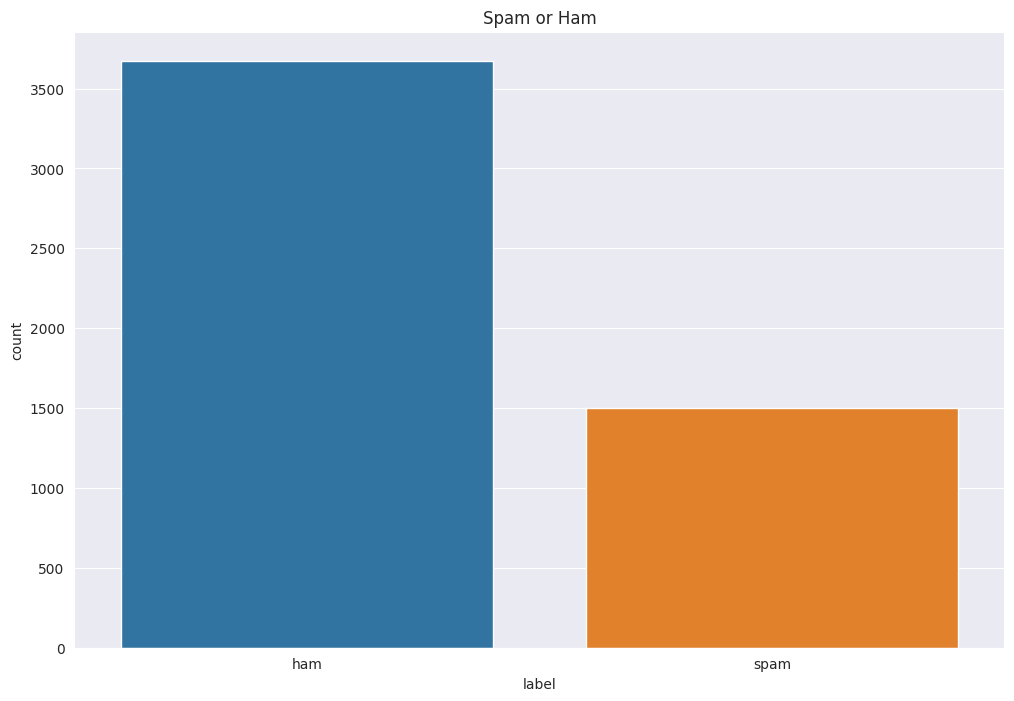

In [118]:
# create a bar chart of mail label counts

plt.figure(figsize = (12, 8))
sns.set_style('darkgrid')
sns.countplot(x='label',data=df)
plt.title('Spam or Ham')

Text(0.5, 1.0, 'Length of Text')

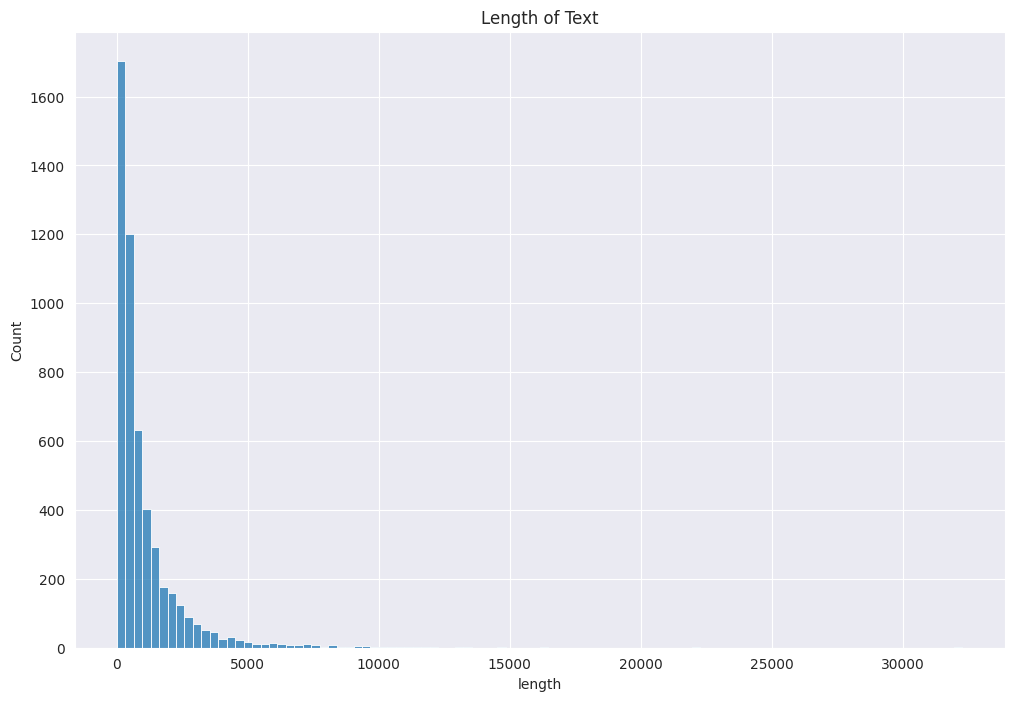

In [78]:
# text length histogram

plt.figure(figsize = (12, 8))
sns.histplot(x='length',data=df,bins=100)
plt.title('Length of Text')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

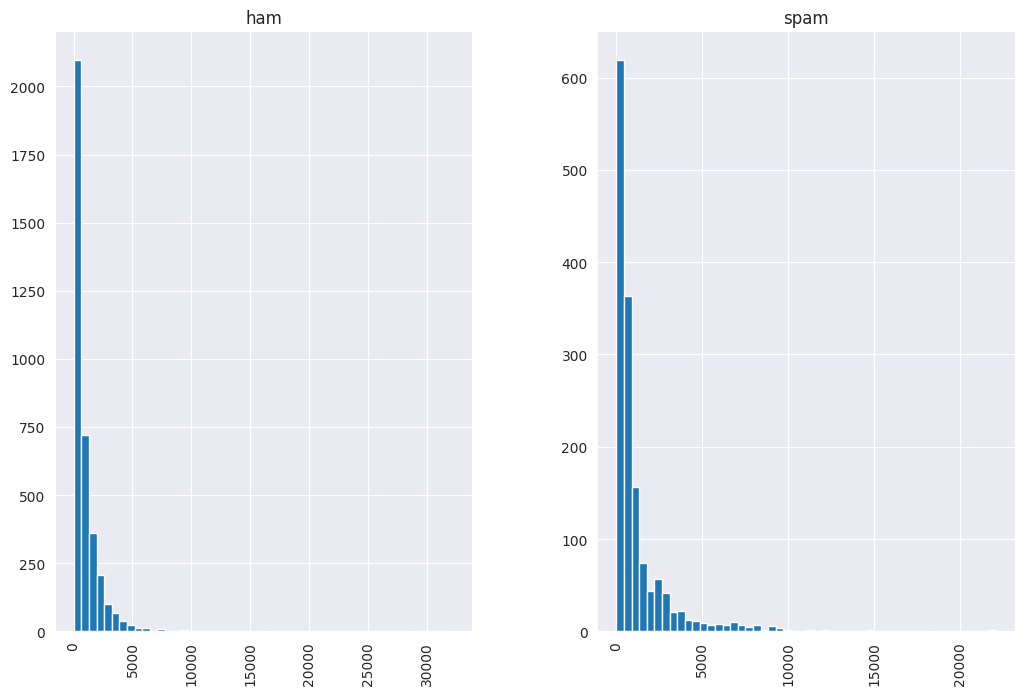

In [80]:
# text length histogram by label

df.hist(column='length',by='label',figsize=(12,8), bins = 50)

## Data Preprocessing

In [57]:
df.isnull().any()

Unnamed: 0    False
label         False
text          False
label_num     False
dtype: bool

In [14]:
# separating the data as texts and label

x = df["text"]
y = df["label_num"]

In [89]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 8)

print(x_train.shape)
print(x_test.shape)

(3878,)
(1293,)


In [ ]:
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

print('Before cleaning:')
df['text'][0]

## Feature Extraction

In [188]:
# convert text data into numerical value which can ube used as input to the models

feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True )



In [91]:
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [92]:
print(x_train_features)

  (0, 40216)	0.11967849640381895
  (0, 25601)	0.0726558383182306
  (0, 6057)	0.11401637222262312
  (0, 16034)	0.11967849640381895
  (0, 18078)	0.11401637222262312
  (0, 29234)	0.06518933478434345
  (0, 26770)	0.10433690700183472
  (0, 10772)	0.09465744178104632
  (0, 26885)	0.09154134998298942
  (0, 15616)	0.08096063552066536
  (0, 23087)	0.11967849640381895
  (0, 20391)	0.10688293938497367
  (0, 15000)	0.11967849640381895
  (0, 33823)	0.18931488356209264
  (0, 36257)	0.08752400894339687
  (0, 20590)	0.11967849640381895
  (0, 19304)	0.10433690700183472
  (0, 33419)	0.09250480207335325
  (0, 8273)	0.06888136455622322
  (0, 28485)	0.10031956596224216
  (0, 6143)	0.07856082977701163
  (0, 9075)	0.08824029499780003
  (0, 24510)	0.11401637222262312
  (0, 10355)	0.11967849640381895
  (0, 16462)	0.08233530353901901
  :	:
  (3877, 37347)	0.2618572807968999
  (3877, 21789)	0.10254989090291666
  (3877, 158)	0.07237682185877435
  (3877, 810)	0.14459354757382908
  (3877, 13124)	0.07159105510375699

## Training Models

In [122]:
# Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train_features, y_train)

LogisticRegression()

In [130]:
# Support Vector Machines Classifier
SVC = SVC(kernel='rbf')
SVC.fit(x_train_features, y_train)

SVC()

In [131]:
# Naive Bayes Classifier
NB = MultinomialNB()
NB.fit(x_train_features, y_train)

MultinomialNB()

In [132]:
# Random Forest Classifer
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(x_train_features, y_train)

RandomForestClassifier(random_state=42)

## Evaluating Models

<b>Note:</b>

The reason we want to check accuracy on the prediction of both the training data and testing data is to identify the problem of overfitting if it happens.

Overfitting is when the model learns the training data too well, capturing noises and random fluctuations on the training data instead of underlying patterns, thereby performing extremely well on the training data but poorly on the testing data.

In [154]:
models_accuracy_train = []
for model in [LR, SVC, NB, RF]:
    predic = model.predict(x_train_features)
    models_accuracy_train.append(accuracy_score(y_train, predic))

models_accuracy_train

[0.9961320268179474, 1.0, 0.9680247550283652, 1.0]

In [139]:
models_accuracy_test = []
for model in [LR, SVC, NB, RF]:
    predic1 = model.predict(x_test_features)
    models_accuracy_test.append(accuracy_score(y_test, predic1))

models_accuracy_test

[0.9876256767208044,
 0.9860788863109049,
 0.9187935034802784,
 0.9775715390564579]

In [166]:
df1 = pd.DataFrame({'Model':['Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'Random Forest'], 'Training data accuracy': models_accuracy_train, 'Testing data accuracy': models_accuracy_test})
df1

,Model,Training data accuracy,Testing data accuracy
0,Logistic Regression,0.996132,0.987626
1,Support Vector Machines,1.000000,0.986079
2,Naive Bayes,0.968025,0.918794
3,Random Forest,1.000000,0.977572


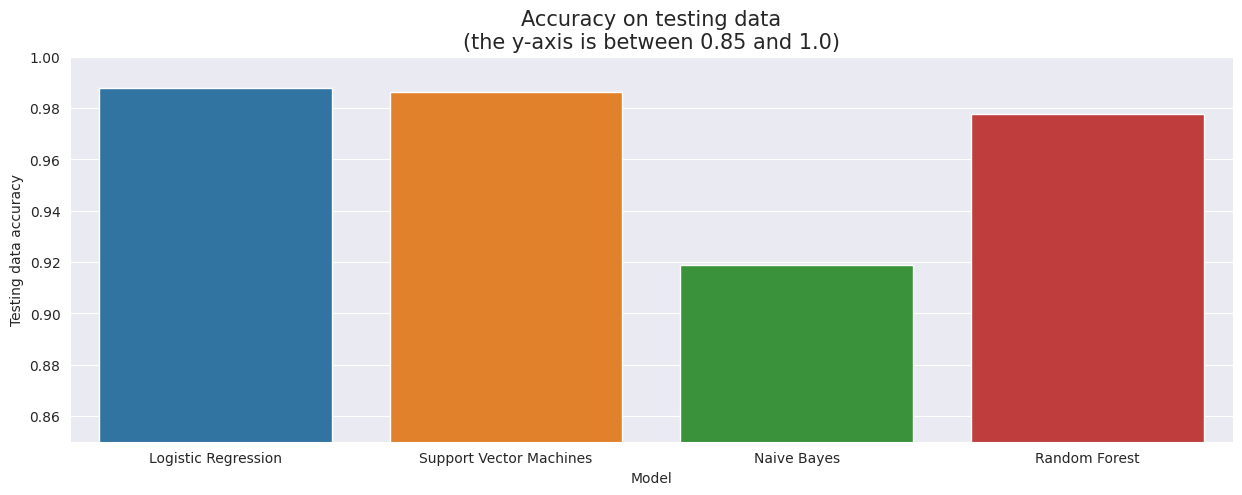

In [169]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Testing data accuracy', data = df1)
plt.title('Accuracy on testing data\n(the y-axis is between 0.85 and 1.0)', fontsize = 15)
plt.ylim(0.85,1)
plt.show()

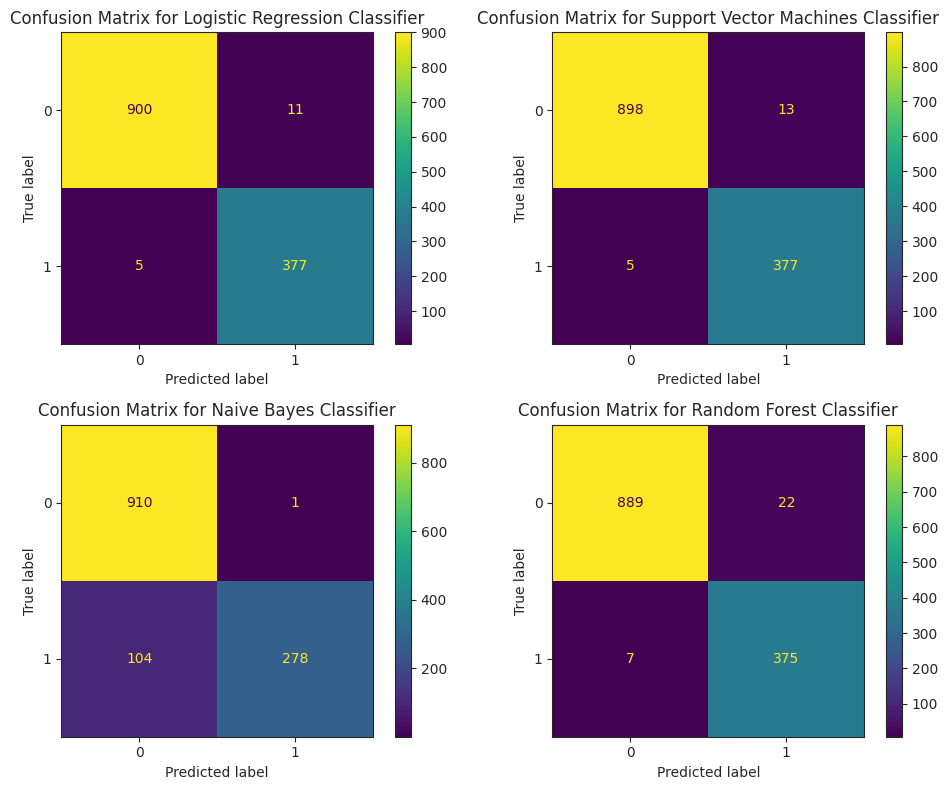

In [183]:
# Plotting confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = [LR, SVC, NB, RF] 
model_names = ['Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'Random Forest']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, (model, model_name) in enumerate(zip(models, model_names)):
    predictions = model.predict(x_test_features)
    cm = confusion_matrix(y_test, predictions)
    
    # Calculate subplot location
    row = i // 2
    col = i % 2
    
    # Plot confusion matrix on the corresponding subplot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[row, col])
    axes[row, col].set_title(f"Confusion Matrix for {model_name} Classifier")

plt.tight_layout()
plt.show()

## Build a spam-detection system

In [184]:
# Use Logistic Regression as an example
def spam_detection(mail):
    
    mail_features = feature_extraction.transform(mail)
    
    prediction = LR.predict(mail_features)
    
    if prediction[0] == 1:
        return "Spam mail"
        
    else:
        return "Ham mail"

In [185]:
spam_detection(["on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about ."])

'Ham mail'